In [2]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(study_results,mouse_metadata,on="Mouse ID")
# Display the data table for preview
full_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [3]:
#Make a copy of the complete merged dataset
full = full_data.copy()
#Create a dataframe using the copied dataset
full_df = pd.DataFrame(full)

In [4]:
# Checking the number of mice.
mouse_id = full_df[['Mouse ID']]
n_mice = mouse_id.nunique()
n_mice

Mouse ID    249
dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = full_df[full_df.duplicated()][['Mouse ID']]
duplicate_id

,Mouse ID
861,g989


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_subset = full_df[full_df['Mouse ID'] == "g989"]
g989_subset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = full_df[full_df['Mouse ID'] != "g989"]
clean_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## 1. Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

### 1.1 Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
###     mean, median, variance, standard deviation, and SEM of the tumor volume. 
### 1.2 Assemble the resulting series into a single summary DataFrame.

In [9]:
# Get list of drug regimens
regimens = clean_df['Drug Regimen'].unique()
regimens

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [10]:
#Calculate each summary statistic
mean = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
standard_deviation = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
SEM = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


summary_table = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance,
                              "Tumor Volume Standard Deviation":standard_deviation, "Tumor Volume SEM":SEM})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### 2. Using the aggregation method, produce the same summary statistics in a single line.

In [11]:
#Use aggregate() to create the same summary table
aggregate = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem'],
                                                   'Weight (g)':['mean', 'median']})
aggregate

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

             Weight (g)         
                   mean median  
Drug Regimen                    
Capomulin     19.965217   20.5  
Ceftamin      27.398876   28.0  
Infubinol     27.196629   27.0  
Ketapril      27.861702   28.0  
Naftisol      27.166667   27.0  
Placebo       27.928177   28.0  
Propriva      27.135135   26.0  
Ramicane      19.679825   19.0  
Stelasyn      27.856354   28.0  
Zoniferol     27.692308   28.0

## Bar and Pie Charts

### 3. Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Text(0.5, 0, 'Drug Regimen')

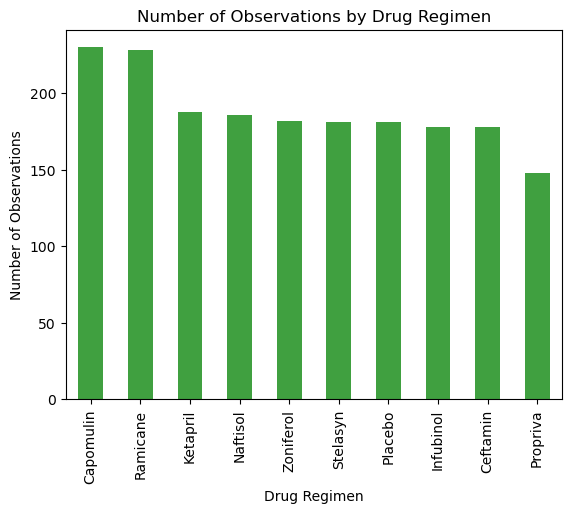

In [12]:
regimens = list(regimens)
n_obs = clean_df['Drug Regimen'].value_counts()

n_obs.plot.bar(color = 'g', alpha = 0.75)
plt.title('Number of Observations by Drug Regimen')
plt.ylabel('Number of Observations')
plt.xlabel('Drug Regimen')

### 3.5 Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

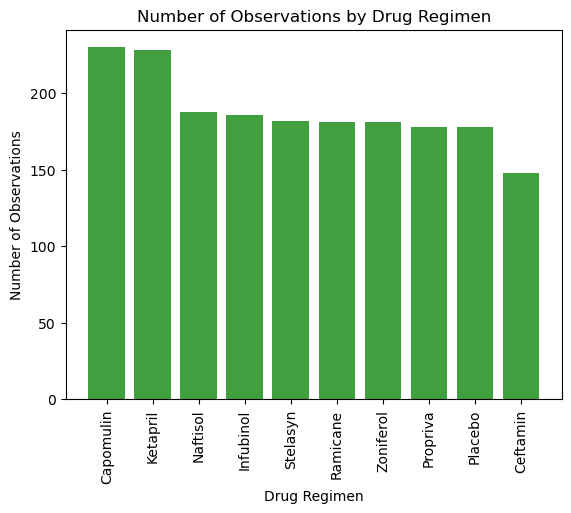

In [13]:
plt.bar(regimens, n_obs, color='g', alpha=0.75, align="center")

plt.title("Number of Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Observations")
plt.show()

### 4. Generate a pie plot showing the distribution of female versus male mice using Pandas

In [14]:
gender = clean_df.groupby(['Sex'])['Mouse ID'].count()
gender

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

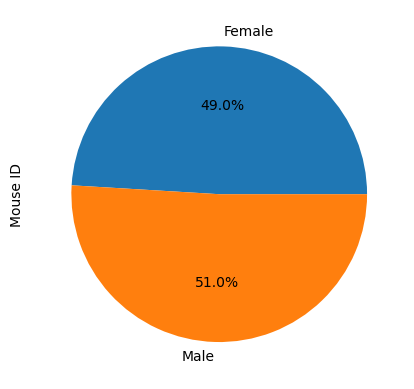

In [15]:
gender.plot.pie(autopct='%1.1f%%')
plt.show()

### 4.5 Generate a pie plot showing the distribution of female versus male mice using pyplot

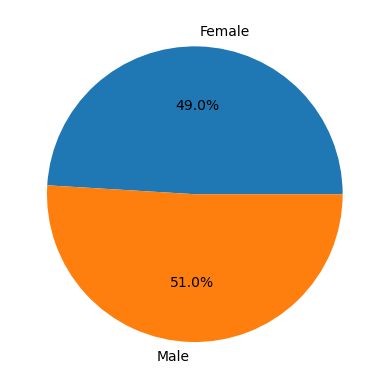

In [16]:
labels = gender.index
sizes = gender.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

### 5. Calculate the final tumor volume of each mouse across four of the treatment regimens:  
### Capomulin, Ramicane, Infubinol, and Ceftamin

### 5.1 Start by getting the last (greatest) timepoint for each mouse


### 5.2 Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [17]:
#View clean dataframe for reference before further manipulation
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [86]:
#Create a dataframe that has the last timepoint for each Mouse ID using groupby
last_timepoint_df = clean_df.groupby(['Drug Regimen', 'Mouse ID'])[['Tumor Volume (mm3)','Timepoint']].max()
last_timepoint_df

Tumor Volume (mm3)  Timepoint
Drug Regimen Mouse ID                               
Capomulin    b128               45.651331         45
             b742               45.000000         45
             f966               45.000000         20
             g288               46.304003         45
             g316               46.809225         45
...                                   ...        ...
Zoniferol    q633               70.827796         45
             s337               62.109651         45
             w140               47.717952          5
             w575               68.401286         45
             x613               48.077646         15

[248 rows x 2 columns]

In [93]:
#Reset the dataframe's index and set to Drug Regimen
df = last_timepoint_df.reset_index()
df = df.set_index('Drug Regimen')
df

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Capomulin,b128,45.651331,45
Capomulin,b742,45.000000,45
Capomulin,f966,45.000000,20
Capomulin,g288,46.304003,45
Capomulin,g316,46.809225,45
...,...,...,...
Zoniferol,q633,70.827796,45
Zoniferol,s337,62.109651,45
Zoniferol,w140,47.717952,5


### 6. Put treatments into a list for for loop (and later for plot labels)

In [88]:
#Create a list of the four treatment regimens of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

### 6.1 Create empty list to fill with tumor vol data (for plotting)

### 6.2 Calculate the IQR and quantitatively determine if there are any potential outliers. 
### 6.3 Locate the rows which contain mice on each drug and get the tumor volumes
### 6.4 Add subset
### 6.5 Determine outliers using upper and lower bounds

In [105]:
data = []
for treatment in treatments:
    tumor_data = []
    tumor_volume_vector = df[df.index == treatment]['Tumor Volume (mm3)']
    
    quartiles = tumor_volume_vector.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = (upperq-lowerq).round(2)

    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    
    for row in tumor_volume_vector:
        tumor_data.append(row)
    
    data.append(tumor_data)
        
    outliers = []
    for obs in tumor_data:
        if obs <= lower_bound:
            outliers.append(obs)
        elif obs >= upper_bound:
            outliers.append(obs)
        
    print(f"{treatment}:")
    print(f"The lower quartile for Tumor Volume (mm3) for the {treatment} Treatment Group is: {lowerq}")
    print(f"The upper quartile for Tumor Volume (mm3) for the {treatment} Treatment Group is: {upperq}")
    print(f"The interquartile range for Tumor Volume (mm3) for the {treatment} Treatment Group is: {iqr}")
    print(f"For {treatment}, values below {lower_bound} could be outliers.")
    print(f"For {treatment}, values above {upper_bound} could be outliers.")
    print(f"There are {len(outliers)} outliers.\n")

Capomulin:
The lower quartile for Tumor Volume (mm3) for the Capomulin Treatment Group is: 45.0
The upper quartile for Tumor Volume (mm3) for the Capomulin Treatment Group is: 46.75
The interquartile range for Tumor Volume (mm3) for the Capomulin Treatment Group is: 1.75
For Capomulin, values below 42.38 could be outliers.
For Capomulin, values above 49.38 could be outliers.
There are 0 outliers.

Ramicane:
The lower quartile for Tumor Volume (mm3) for the Ramicane Treatment Group is: 45.0
The upper quartile for Tumor Volume (mm3) for the Ramicane Treatment Group is: 46.34
The interquartile range for Tumor Volume (mm3) for the Ramicane Treatment Group is: 1.34
For Ramicane, values below 42.99 could be outliers.
For Ramicane, values above 48.35 could be outliers.
There are 0 outliers.

Infubinol:
The lower quartile for Tumor Volume (mm3) for the Infubinol Treatment Group is: 54.05
The upper quartile for Tumor Volume (mm3) for the Infubinol Treatment Group is: 65.53
The interquartile ran

### 7. Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

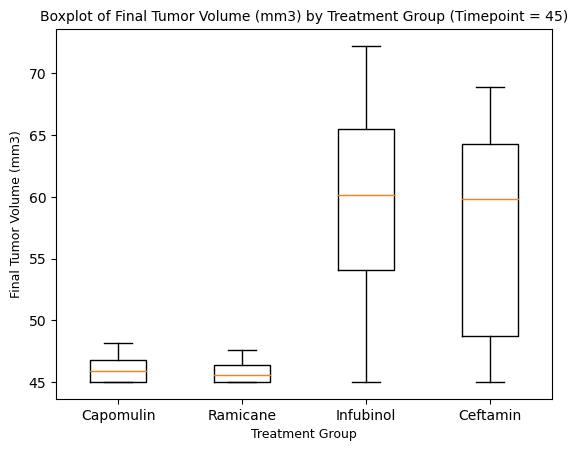

In [96]:
#Assign treatments as labels for boxplot
labels = treatments
#Plot data
fig = plt.boxplot(data, labels = labels)
plt.title("Boxplot of Final Tumor Volume (mm3) by Treatment Group",size=10)
plt.xlabel("Treatment Group", size = 9)
plt.ylabel("Final Tumor Volume (mm3)", size = 9)
plt.show()

### 8. Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [97]:
len(clean_df)

1880

In [98]:
capomulin_full = clean_df.loc[clean_df['Drug Regimen'] == treatments[0]]
capomulin_full

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


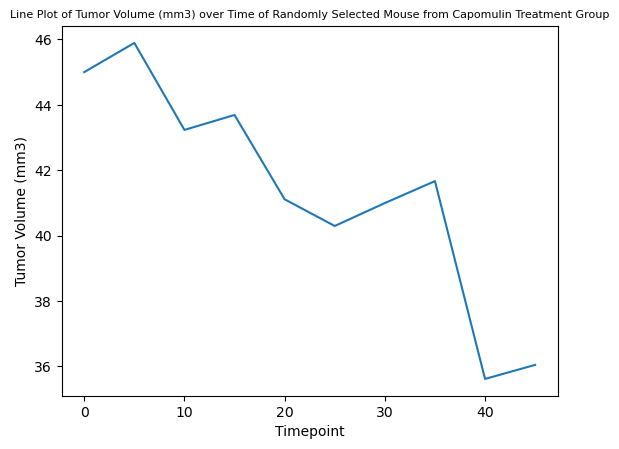

In [101]:
cap_mouse_ids = list(capomulin_full['Mouse ID'].unique())
len(cap_mouse_ids)

random_mouse_index_generator = np.random.randint(0, 25, size=None, dtype=int) 

random_mouse_subset = capomulin_full[capomulin_full['Mouse ID'] == cap_mouse_ids[random_mouse_index_generator]]
random_mouse_subset

cap_tumor_vol = random_mouse_subset['Tumor Volume (mm3)']
cap_timepoints = random_mouse_subset['Timepoint']

plt.plot(cap_timepoints, cap_tumor_vol)
plt.title("Line Plot of Tumor Volume (mm3) over Time of Randomly Selected Mouse from Capomulin Treatment Group", size=8)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

### 9. Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [102]:
capomulin_weight_groups = capomulin_full.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
capomulin_weight_groups

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

Text(0, 0.5, 'Tumor Volume (mm3)')

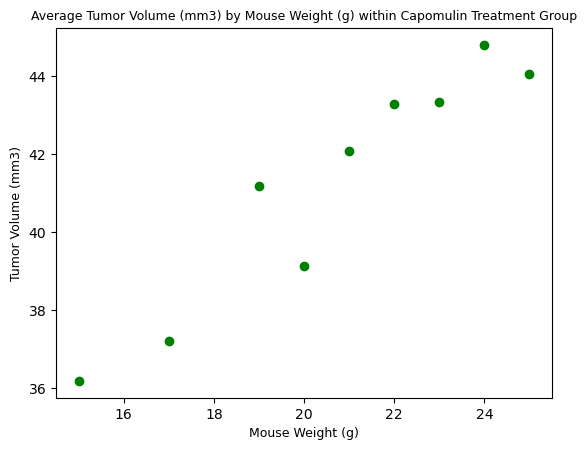

In [103]:
plt.scatter(capomulin_weight_groups.index,capomulin_weight_groups, color = 'g')
plt.title("Average Tumor Volume (mm3) by Mouse Weight (g) within Capomulin Treatment Group", size = 9)
plt.xlabel("Mouse Weight (g)", size = 9)
plt.ylabel("Tumor Volume (mm3)", size = 9)

### 10. Calculate the correlation coefficient and linear regression model 
### for mouse weight and average tumor volume for the Capomulin regimen

In [104]:
x = capomulin_weight_groups.index
y = capomulin_weight_groups

r = np.corrcoef(x,y)
correlation = r[0,1].round(2)
print(f"The correlation coefficient for mouse weight (g) and average tumor volume (mm3) for the Capomulin group is {correlation}.")

The correlation coefficient for mouse weight (g) and average tumor volume (mm3) for the Capomulin group is 0.95.
